# Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import csv
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

seed=123456
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

# For load file "A1_dataset.csv" into Jupyter Notebook Colab  
(not needed if not using Colab)

In [ ]:
from google.colab import files
uploaded = files.upload()
! ls
! pwd

Saving A1_dataset.csv to A1_dataset.csv
A1_dataset.csv	sample_data
/content


# Descriptive analysis  
Take into account a dataset containing information regarding a market analysis in the mobile telephony sector. The dataset contains information regarding the technical characteristics of the devices and price ranges.
The purpose of the analysis will be to study the various characteristics of the devices, in order to understand how these affect the price of the device.

*

The latter requests (12 through 16), which need some previous knowledge of data science and classification models

## 1. Data Loading
Load the dataset using either the `csv` or `xlsx` file.

In [ ]:
df = pd.read_csv("A1_dataset.csv") 

## 2. Explorative analysis
Visualize the first $5$ entries of the dataset.

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,N,2.2,NaN,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,Y,1
1,1021,Y,0.5,1.0,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,N,2
2,563,Y,0.5,1.0,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,N,2
3,615,Y,2.5,NaN,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,N,2
4,1821,Y,1.2,NaN,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,N,1


Check for null values along any of the columns.

In [ ]:
print(df['m_dep'].hasnans)

False


In [ ]:
print(df['clock_speed'].hasnans)

False


In [ ]:
print(df['battery_power'].isnull().values.any())

False


In [ ]:
print(df['dual_sim'].isnull().values.any())

#Count the NaN
df['dual_sim'].isnull().sum()

True


981

Show info about the dataframe: columns, data types, non-null values and memory footprint.
You can use: `pandas.DataFrame.info`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       1019 non-null   float64
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
print(df.dtypes.value_counts())

int64      16
float64     3
object      2
dtype: int64


In [ ]:
df['blue'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: blue
Non-Null Count  Dtype 
--------------  ----- 
2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [ ]:
df['dual_sim'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: dual_sim
Non-Null Count  Dtype  
--------------  -----  
1019 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


Generate descriptive statistics.
You can use: `pandas.DataFrame.describe`

In [ ]:
print(f'{df.describe()}')

       battery_power  clock_speed  dual_sim           fc       four_g  \
count    2000.000000  2000.000000    1019.0  2000.000000  2000.000000   
mean     1238.518500     1.522250       1.0     4.309500     0.521500   
std       439.418206     0.816004       0.0     4.341444     0.499662   
min       501.000000     0.500000       1.0     0.000000     0.000000   
25%       851.750000     0.700000       1.0     1.000000     0.000000   
50%      1226.000000     1.500000       1.0     3.000000     1.000000   
75%      1615.250000     2.200000       1.0     7.000000     1.000000   
max      1998.000000     3.000000       1.0    19.000000     1.000000   

        int_memory        m_dep    mobile_wt      n_cores           pc  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     32.046500     0.501750   140.249000     4.520500     9.916500   
std      18.145715     0.288416    35.399655     2.287837     6.064315   
min       2.000000     0.100000    80.000000  

Show box plots of features distribution. You can use: `pandas.DataFrame.plot`

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

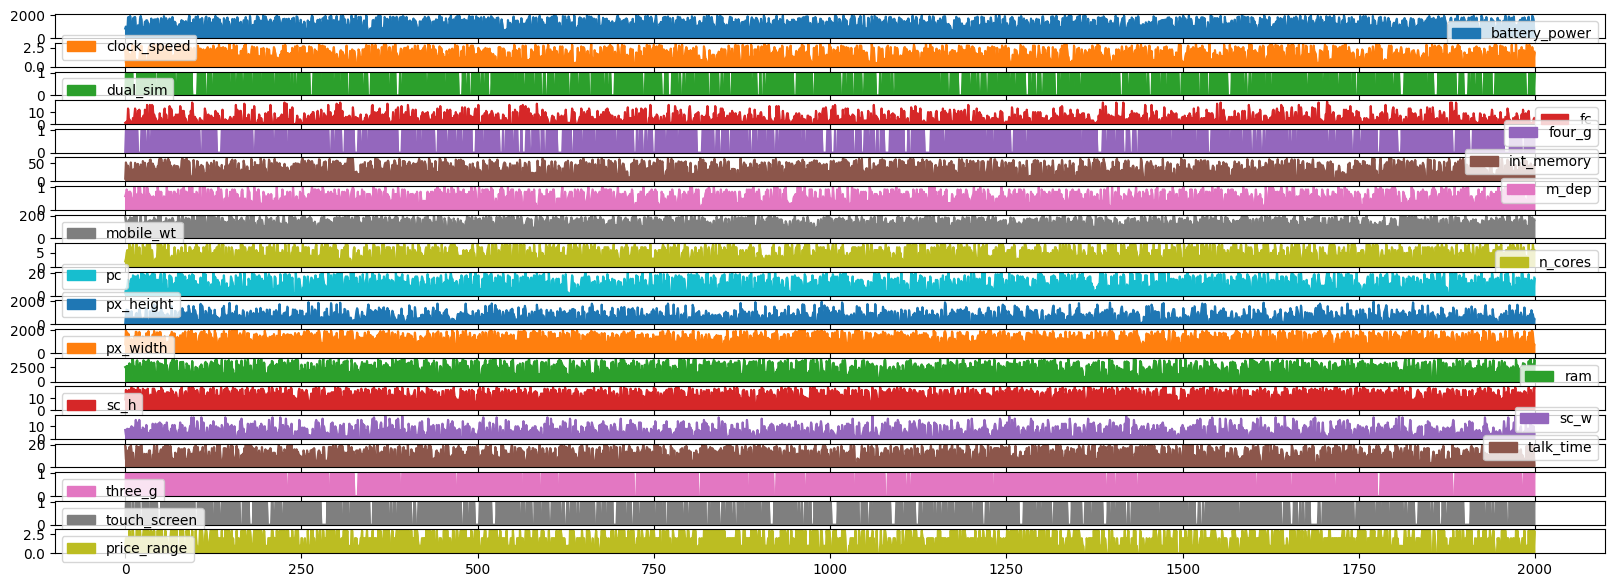

In [ ]:
df.plot.area(figsize=(20, 7), subplots=True)

<Axes: ylabel='Frequency'>

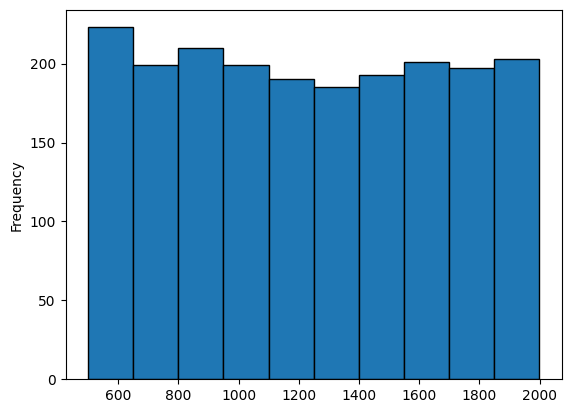

In [ ]:
df['battery_power'].plot(kind = 'hist', edgecolor='black')

<Axes: ylabel='Frequency'>

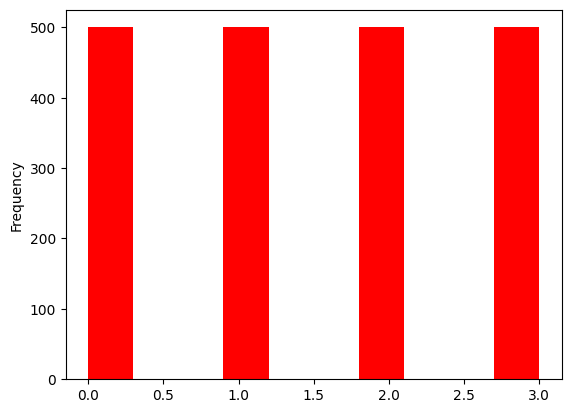

In [ ]:
df['price_range'].plot(kind = 'hist', color='red',align='mid')

<Axes: ylabel='Density'>

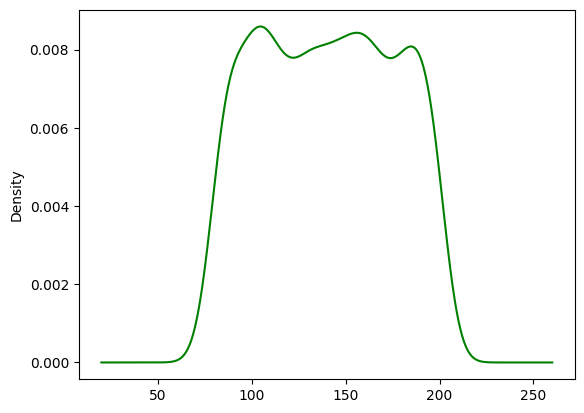

In [ ]:
df['mobile_wt'].plot(kind='kde', color='green')

Text(0.5, 0, 'Battery_power')

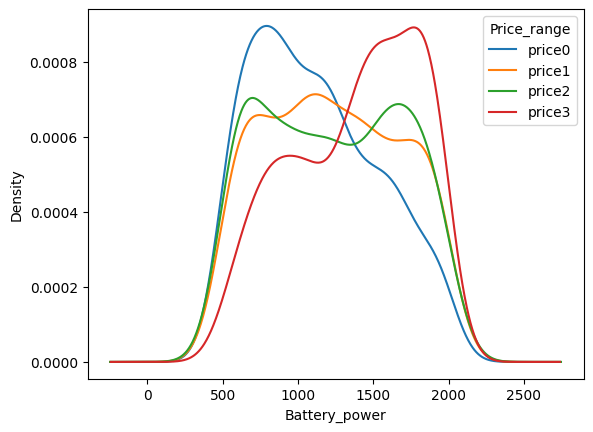

In [ ]:
df.groupby('price_range')['battery_power'].plot(kind='kde')
plt.legend(['price0', 'price1', 'price2', 'price3'], title='Price_range')
plt.xlabel('Battery_power') 

<Axes: xlabel='battery_power', ylabel='ram'>

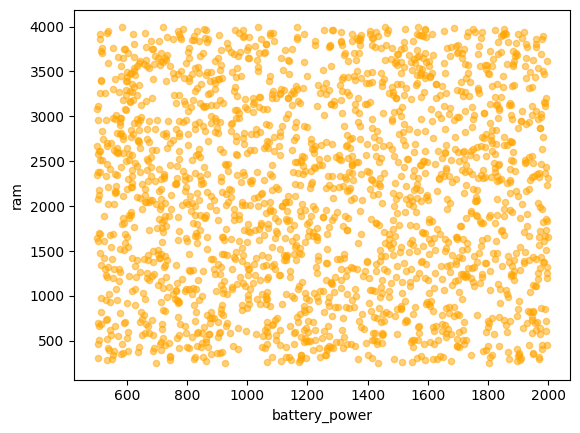

In [ ]:
df.plot(kind='scatter', x='battery_power', y='ram', color='orange', alpha=0.5)

Check whether the dataset is balanced. A balanced dataset is a dataset where each output class (or target class) is represented by the same number of input samples.

In [ ]:
df['price_range'].value_counts()

#Target class = 'price_range'
#count the number of records for each target class
#Dataset is balanced.

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# 3. Data manipulation

Fill null values of 'dual_sim' with `0` and check the end result after performing the change.

In [ ]:
#Replace NaN Values with Zeros
df['dual_sim'] = df['dual_sim'].fillna(0)

#Check
print(df['dual_sim'].isnull().values.any())
#Alternative
#print(df['dual_sim'].isnull().sum())
#print(df['dual_sim'])


False


In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,N,2.2,0.0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,Y,1
1,1021,Y,0.5,1.0,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,N,2
2,563,Y,0.5,1.0,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,N,2
3,615,Y,2.5,0.0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,N,2
4,1821,Y,1.2,0.0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,N,1


Performs the mapping `{Y : 1 ; N : 0}` to columns 'blue' and 'wifi'. You can use: `pandas.DataFrame.apply()`

In [ ]:
df['wifi'] = df['wifi'].apply(lambda x : 1 if (x == 'Y') else 0)
df['blue'] = df['blue'].apply(lambda x : 1 if (x == 'Y') else 0)

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0.0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1.0,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1.0,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0.0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0.0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# 4. Correlation
Calculates the correlation of features and represents it via a heatmap. You can use: `pandas.DataFrame.corr`

<Axes: >

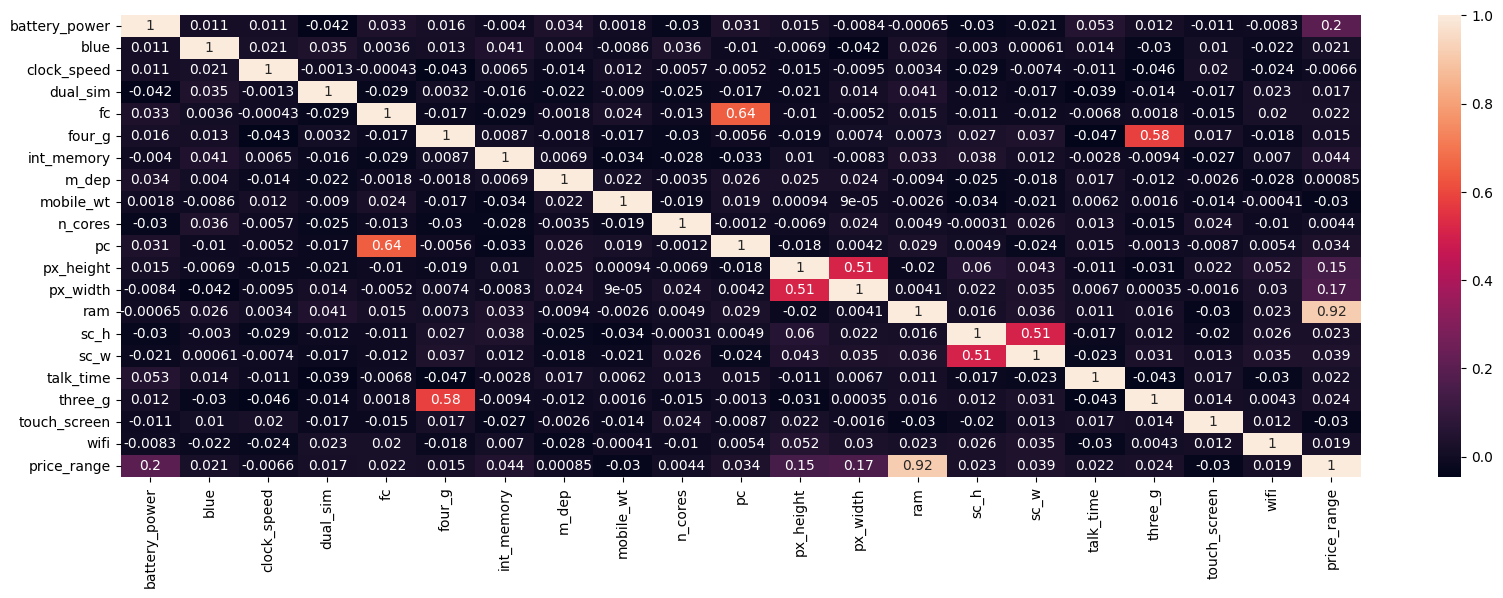

In [ ]:
df.corr()

fig, ax = plt.subplots(figsize=(20, 6))

sn.heatmap(df.corr(), ax=ax, annot=True)  #  use seaborn lib

In [ ]:
# Plot pairwise relationships in a dataset
sn.pairplot(data=df, hue='price_range')

# 5. Statistical analysis of features through graphic libraries

Number of devices for `price_range`

In [ ]:
print(df['price_range'].value_counts())
print(df['price_range'].count())


1    500
2    500
3    500
0    500
Name: price_range, dtype: int64
2000


Column values distribution by target using a boxplot.

array([[<Axes: title={'center': 'battery_power'}, xlabel='price_range'>,
        <Axes: title={'center': 'blue'}, xlabel='price_range'>,
        <Axes: title={'center': 'clock_speed'}, xlabel='price_range'>,
        <Axes: title={'center': 'dual_sim'}, xlabel='price_range'>,
        <Axes: title={'center': 'fc'}, xlabel='price_range'>],
       [<Axes: title={'center': 'four_g'}, xlabel='price_range'>,
        <Axes: title={'center': 'int_memory'}, xlabel='price_range'>,
        <Axes: title={'center': 'm_dep'}, xlabel='price_range'>,
        <Axes: title={'center': 'mobile_wt'}, xlabel='price_range'>,
        <Axes: title={'center': 'n_cores'}, xlabel='price_range'>],
       [<Axes: title={'center': 'pc'}, xlabel='price_range'>,
        <Axes: title={'center': 'px_height'}, xlabel='price_range'>,
        <Axes: title={'center': 'px_width'}, xlabel='price_range'>,
        <Axes: title={'center': 'ram'}, xlabel='price_range'>,
        <Axes: title={'center': 'sc_h'}, xlabel='price_range'

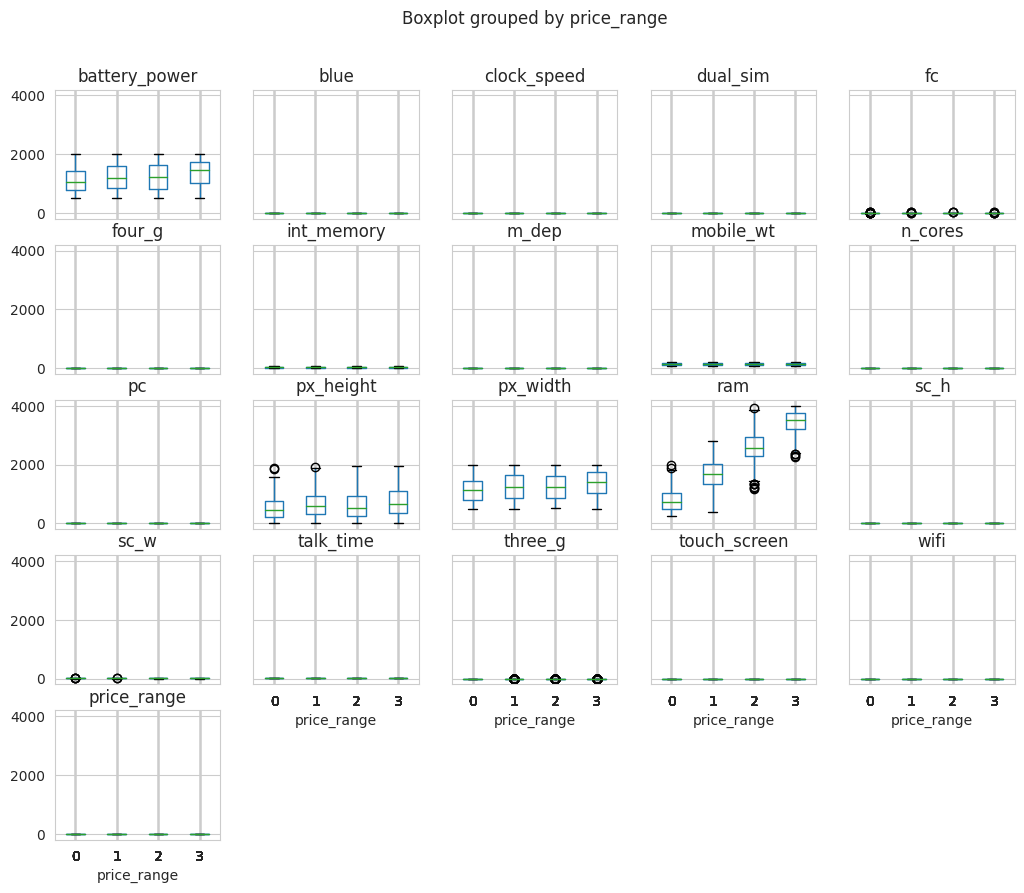

In [ ]:
col = df.columns
col = list(col)
df.boxplot(by ='price_range', column=col, figsize=[12,10]) 



Graphically represents the relationship between `px_width` and `px_height`.

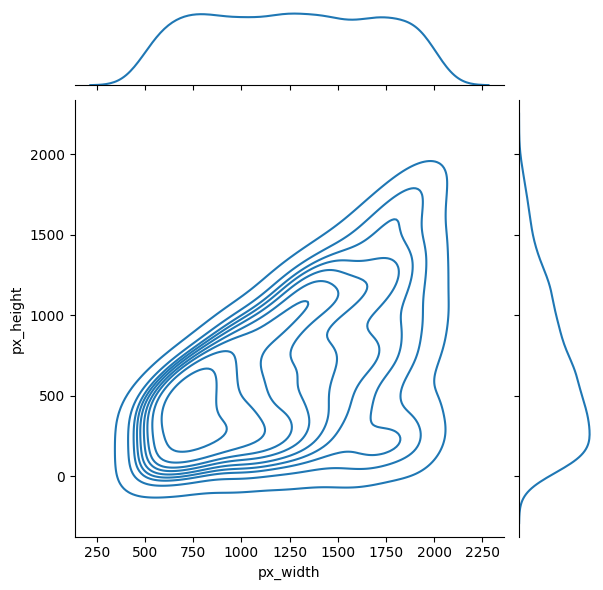

In [ ]:
sn.jointplot(x = "px_width", y="px_height", data=df, kind = 'kde')

Graphically represents the relationship between `pc` and `fc`.

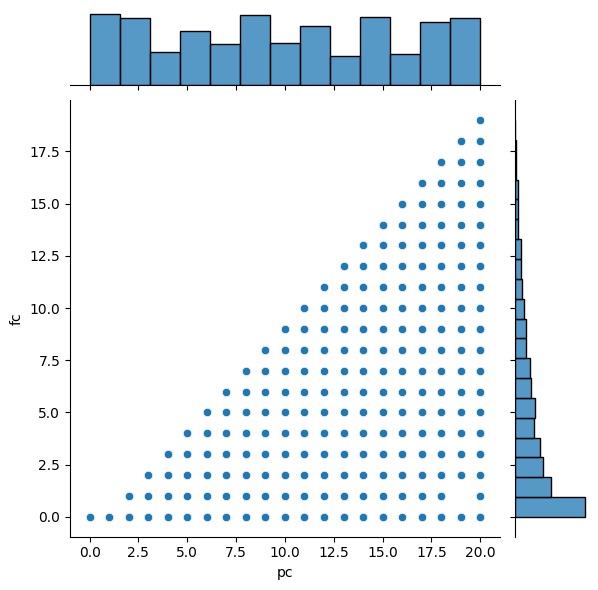

In [ ]:
sn.jointplot(x = "pc", y="fc", data=df)

Display the number of devices for various values of `n_cores` using bar charts.

n_c  Counts dev
4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64


Text(0.5, 0, 'n_core')

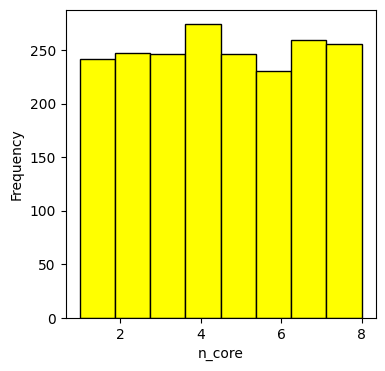

In [ ]:
print("n_c ","Counts dev")
print(df['n_cores'].value_counts())

df['n_cores'].plot( kind = 'hist', color='yellow',edgecolor='black', align='mid', stacked=True, bins=8 , figsize = (4,4))

plt.xlabel('n_core')

Calculate the number of devices based on the values of `four_g` and `three_g` and represents it as pie charts.
You can use `pandas.DataFrame.groupby`

<Axes: title={'center': '4G'}>

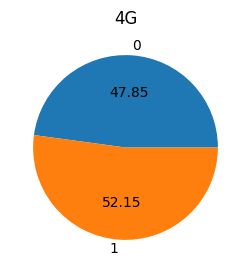

In [ ]:
df_0 = df.groupby("four_g").size()
df_0.plot.pie(autopct="%.2f",figsize=(3,3), title = "4G")

<Axes: title={'center': '3G'}>

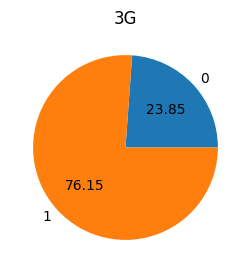

In [ ]:
df_1 = df.groupby("three_g").size()
df_1.plot.pie(autopct="%.2f",figsize=(3,3),title = "3G")


# 6. Creation of new features

Add column `sc_dim = sc_w * sc_h`

In [ ]:
df=df.assign( sc_dim =lambda x: x.sc_w * x.sc_h )

Add column `px_dim = px_width * px_height`

In [ ]:
df=df.assign( px_dim =lambda x: x.px_width * x.px_height )

Add column `3g_4g` according to the following mapping:
```
0 if 3G:N 4G:N
1 if 3G:Y 4G:N
2 if 3G:N 4G:Y
3 if 3G:Y 4G:Y
```

In [ ]:
lr = len(df.index)
df["3g_4g"] = 0     # generate new column

for i in range(lr):
  if df['four_g'][i] == df['three_g'][i] == 1:
    df["3g_4g"][i] = 3
  elif (df['four_g'][i] == 1) and  (df['three_g'][i] == 0):
    df["3g_4g"][i] = 2
  elif (df['four_g'][i] == 0) and  (df['three_g'][i] == 1):
    df["3g_4g"][i] = 1
  else:
    pass

Move "price_range" column to the end

In [ ]:
temp_cols=df.columns.tolist()
print(temp_cols)
indexr=df.columns.get_loc("price_range") #  current position of price 
new_cols= temp_cols[0:indexr] + temp_cols[indexr+1:] + temp_cols[indexr:indexr+1]
print(new_cols)
df=df[new_cols]

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range', 'sc_dim', 'px_dim', '3g_4g']
['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'sc_dim', 'px_dim', '3g_4g', 'price_range']


In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,sc_dim,px_dim,3g_4g,price_range
0,842,0,2.2,0.0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,63,15120,0,1
1,1021,1,0.5,1.0,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,51,1799140,3,2
2,563,1,0.5,1.0,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,22,2167308,3,2
3,615,1,2.5,0.0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,128,2171776,1,2
4,1821,1,1.2,0.0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,16,1464096,3,1


# 7. Dropping features
Drop the columns: `sc_w`, `sc_h`, `px_width`, `px_height`, `four_g`, and `three_g`.

In [ ]:
df = df.drop(columns=['sc_w', 'sc_h', 'px_width', 'px_height','four_g','three_g'])

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,sc_dim,px_dim,3g_4g,price_range
0,842,0,2.2,0.0,1,7,0.6,188,2,2,2549,19,0,1,63,15120,0,1
1,1021,1,0.5,1.0,0,53,0.7,136,3,6,2631,7,1,0,51,1799140,3,2
2,563,1,0.5,1.0,2,41,0.9,145,5,6,2603,9,1,0,22,2167308,3,2
3,615,1,2.5,0.0,0,10,0.8,131,6,9,2769,11,0,0,128,2171776,1,2
4,1821,1,1.2,0.0,13,44,0.6,141,2,14,1411,15,1,0,16,1464096,3,1


# 8. Analyse correlation on the modified dataset

<Axes: >

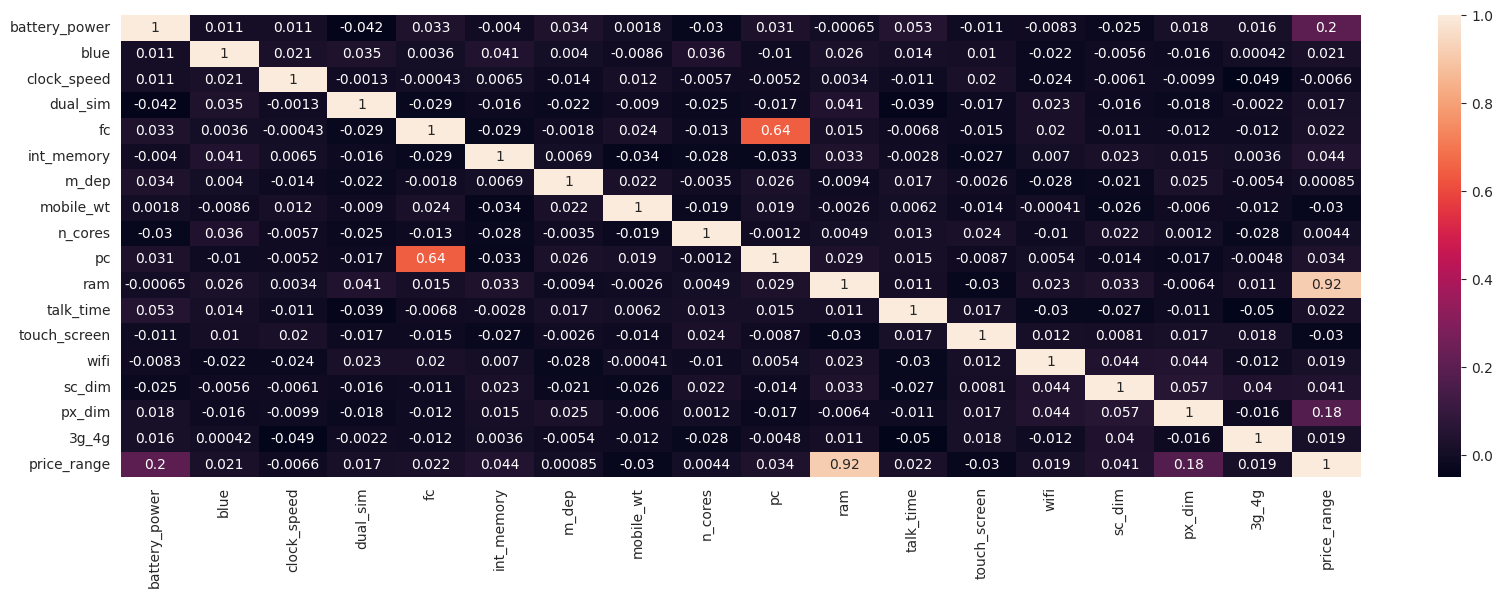

In [ ]:
df.corr()

fig, ax = plt.subplots(figsize=(20, 6))

sn.heatmap(df.corr(), ax=ax, annot=True) 

# 9. Split a target variable
Select the label `price_range` as `y` and the remaining ones as `x`.

In [ ]:
lc = len(df.columns)
#Note in my df "price_range" is last colunm
print(df.columns.get_loc("price_range")== (lc-1))

lp = df.columns.get_loc("price_range") 
df_X = df.iloc[:,:lp]  #   .iloc allows access by location not by label
df_Y = df.iloc[:,lp]


True


In [ ]:
df_Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [ ]:
df_X.head()

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,sc_dim,px_dim,3g_4g
0,842,0,2.2,0.0,1,7,0.6,188,2,2,2549,19,0,1,63,15120,0
1,1021,1,0.5,1.0,0,53,0.7,136,3,6,2631,7,1,0,51,1799140,3
2,563,1,0.5,1.0,2,41,0.9,145,5,6,2603,9,1,0,22,2167308,3
3,615,1,2.5,0.0,0,10,0.8,131,6,9,2769,11,0,0,128,2171776,1
4,1821,1,1.2,0.0,13,44,0.6,141,2,14,1411,15,1,0,16,1464096,3


# 10. Normalization
Normalize the dataset using any method you deem reasonable. Visualize all features distribution before and after normalization using histograms.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df = (scaled_df.round(2))


In [ ]:
scaled_df.head()  #  after normalization

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,sc_dim,px_dim,3g_4g,price_range
0,0.23,0.0,0.68,0.0,0.05,0.08,0.56,0.90,0.14,0.10,0.61,0.94,0.0,1.0,0.18,0.00,0.00,0.33
1,0.35,1.0,0.00,1.0,0.00,0.82,0.67,0.47,0.29,0.30,0.63,0.28,1.0,0.0,0.15,0.46,1.00,0.67
2,0.04,1.0,0.00,1.0,0.11,0.63,0.89,0.54,0.57,0.30,0.63,0.39,1.0,0.0,0.06,0.56,1.00,0.67
3,0.08,1.0,0.80,0.0,0.00,0.13,0.78,0.42,0.71,0.45,0.67,0.50,0.0,0.0,0.37,0.56,0.33,0.67
4,0.88,1.0,0.28,0.0,0.68,0.68,0.56,0.51,0.14,0.70,0.31,0.72,1.0,0.0,0.05,0.38,1.00,0.33


In [ ]:
df.head()  # before  

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,sc_dim,px_dim,3g_4g,price_range
0,842,0,2.2,0.0,1,7,0.6,188,2,2,2549,19,0,1,63,15120,0,1
1,1021,1,0.5,1.0,0,53,0.7,136,3,6,2631,7,1,0,51,1799140,3,2
2,563,1,0.5,1.0,2,41,0.9,145,5,6,2603,9,1,0,22,2167308,3,2
3,615,1,2.5,0.0,0,10,0.8,131,6,9,2769,11,0,0,128,2171776,1,2
4,1821,1,1.2,0.0,13,44,0.6,141,2,14,1411,15,1,0,16,1464096,3,1


array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>],
       [<Axes: title={'center': 'fc'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>],
       [<Axes: title={'center': 'n_cores'}>,
        <Axes: title={'center': 'pc'}>, <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'talk_time'}>],
       [<Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>,
        <Axes: title={'center': 'sc_dim'}>,
        <Axes: title={'center': 'px_dim'}>],
       [<Axes: title={'center': '3g_4g'}>,
        <Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >]],
      dtype=object)

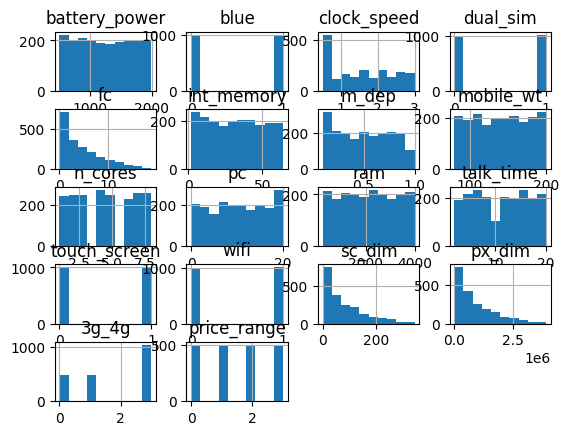

In [ ]:
df.hist()   # before

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>],
       [<Axes: title={'center': 'fc'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>],
       [<Axes: title={'center': 'n_cores'}>,
        <Axes: title={'center': 'pc'}>, <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'talk_time'}>],
       [<Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>,
        <Axes: title={'center': 'sc_dim'}>,
        <Axes: title={'center': 'px_dim'}>],
       [<Axes: title={'center': '3g_4g'}>,
        <Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >]],
      dtype=object)

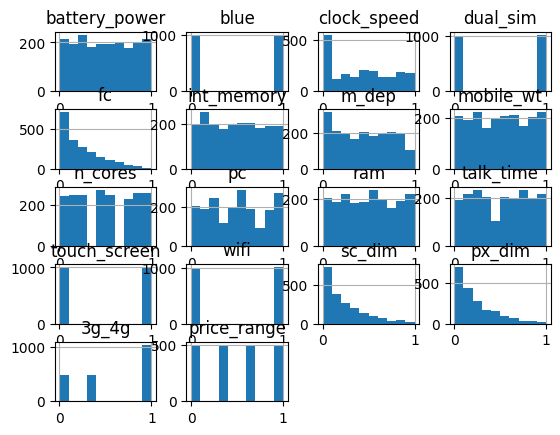

In [ ]:
scaled_df.hist()   # after norm

array([[<Axes: title={'center': 'talk_time'}>]], dtype=object)

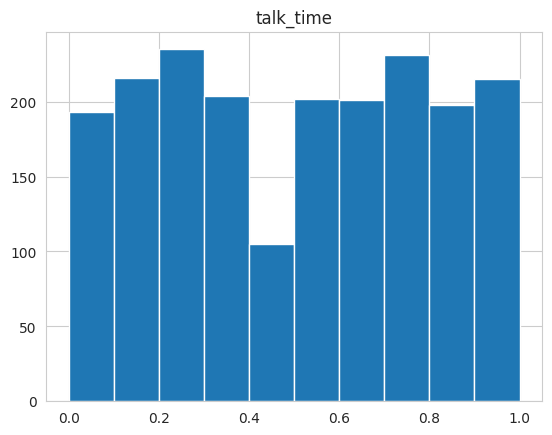

In [ ]:
scaled_df.hist(column='talk_time')  # single feature

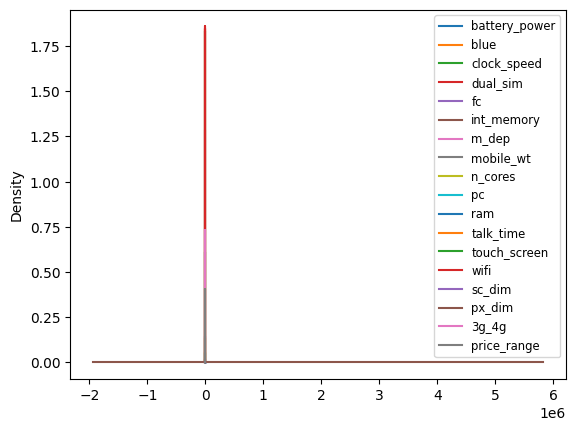

In [ ]:
df.plot(kind='kde').legend(loc='best', fontsize='small') # before norm

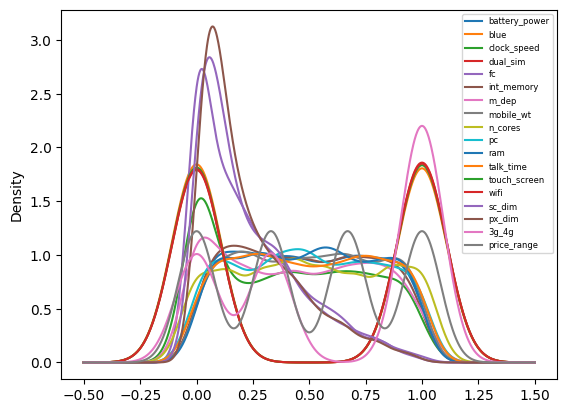

In [ ]:
scaled_df.plot(kind='kde').legend(loc='upper right', fontsize=6 )  #  after normalization

# 11. Split dataset into training and test data
Split `x` (normalized) and `y` into train and test set with a `70:30` ratio.

In [ ]:
scaled_df_X = scaled_df.drop(columns=['price_range'])

trainX, testX = train_test_split(scaled_df_X, test_size=0.3, shuffle=False)
trainY, testY = train_test_split(df_Y, test_size=0.3, shuffle=False)

In [ ]:
print(len(trainX.index))   # how many row
trainX.head()

1400


,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,sc_dim,px_dim,3g_4g
0,0.23,0.0,0.68,0.0,0.05,0.08,0.56,0.90,0.14,0.10,0.61,0.94,0.0,1.0,0.18,0.00,0.00
1,0.35,1.0,0.00,1.0,0.00,0.82,0.67,0.47,0.29,0.30,0.63,0.28,1.0,0.0,0.15,0.46,1.00
2,0.04,1.0,0.00,1.0,0.11,0.63,0.89,0.54,0.57,0.30,0.63,0.39,1.0,0.0,0.06,0.56,1.00
3,0.08,1.0,0.80,0.0,0.00,0.13,0.78,0.42,0.71,0.45,0.67,0.50,0.0,0.0,0.37,0.56,0.33
4,0.88,1.0,0.28,0.0,0.68,0.68,0.56,0.51,0.14,0.70,0.31,0.72,1.0,0.0,0.05,0.38,1.00


In [ ]:
print(len(testX.index))   # how many row
testX.head()

600


,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,sc_dim,px_dim,3g_4g
1400,0.55,1.0,0.0,0.0,0.00,0.18,1.00,0.44,0.43,0.40,0.92,0.89,1.0,0.0,0.17,0.67,1.00
1401,0.30,0.0,0.0,0.0,0.32,0.85,0.00,0.37,1.00,0.35,0.28,0.11,0.0,1.0,0.09,0.04,1.00
1402,0.30,0.0,0.4,1.0,0.32,0.26,0.22,0.33,0.43,0.35,0.71,0.39,1.0,1.0,0.65,0.15,0.33
1403,0.55,1.0,0.0,0.0,0.26,0.40,0.22,0.53,0.29,0.90,0.65,0.17,0.0,1.0,0.04,0.18,1.00
1404,0.63,0.0,0.0,0.0,0.16,0.61,0.67,0.87,0.14,0.25,0.06,1.00,0.0,1.0,0.09,0.26,0.00


In [ ]:
print(len(testY.index))   # how many row
testY.head()

600


1400    3
1401    0
1402    2
1403    2
1404    0
Name: price_range, dtype: int64

# 12. Classification
Using `sklearn` implement the following classification models: decision trees, logistic regression and support vector machines. 

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(trainX,trainY)


DecisionTreeClassifier()

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(trainX,trainY)


LogisticRegression()

In [ ]:
model_svc = SVC()
model_svc.fit(trainX,trainY)


SVC()

In [ ]:
#just a quick test
print(testY[:25].values)
print("---")
predictions_dt = model_dt.predict(testX)
predictions_lr = model_lr.predict(testX)
predictions_svc = model_svc.predict(testX)
print(predictions_dt[:25])
print(predictions_lr[:25])
print(predictions_svc[:25])

[3 0 2 2 0 1 1 2 0 0 1 1 0 2 2 2 0 1 3 0 0 2 2 3 1]
---
[3 0 2 2 0 1 1 2 0 0 1 2 0 2 2 2 0 1 2 0 0 2 2 3 1]
[3 0 2 2 0 1 1 3 0 0 1 1 0 2 2 2 0 1 3 0 0 2 2 3 1]
[3 0 2 2 0 2 1 3 0 1 1 1 0 2 1 2 0 1 2 0 0 2 2 3 1]


# 13. Compare the end results by their accuracy

In [ ]:
#Accuracy =  correct predictions / total number of data points

#print(testY.values.shape)
#print(predictions_dt.shape)
print("DecisionTreeClassifier")
score1 = accuracy_score(predictions_dt,testY.values)
print(score1)
print("LogisticRegression")
score2 = accuracy_score(predictions_lr,testY.values)
print(score2)
print("SVC")
score3 = accuracy_score(predictions_svc,testY.values)
print(score3)

DecisionTreeClassifier
0.845
LogisticRegression
0.8883333333333333
SVC
0.825


## 14. LDA
Use LDA to achieve dimensionality reduction.
 
A method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


lda = LDA()
trainX = lda.fit_transform(trainX, trainY)
testX = lda.transform(testX)

# 15. Classification with feature extraction
Using `sklearn` implement the following classification models: decision trees, logistic regression and support vector machines after LDA.

In [ ]:
model_dt.fit(trainX,trainY)
model_lr.fit(trainX,trainY)
model_svc.fit(trainX,trainY)

SVC()

In [ ]:
#just a quick test
print(testY[:25].values)
print("---")
predictions_dt = model_dt.predict(testX)
predictions_lr = model_lr.predict(testX)
predictions_svc = model_svc.predict(testX)
print(predictions_dt[:25])
print(predictions_lr[:25])
print(predictions_svc[:25])

[3 0 2 2 0 1 1 2 0 0 1 1 0 2 2 2 0 1 3 0 0 2 2 3 1]
---
[3 0 2 2 0 1 1 2 0 0 2 1 0 2 2 2 0 1 2 0 0 3 2 3 1]
[3 0 2 2 0 1 1 3 0 0 1 1 0 2 1 2 0 1 3 0 0 2 2 3 1]
[3 0 2 2 0 1 1 2 0 0 1 1 0 2 2 2 0 1 3 0 0 2 2 3 1]


# 16. Compare the end results by their accuracy

In [ ]:
print("DecisionTreeClassifier")
score1 = accuracy_score(predictions_dt,testY.values)
print(score1)
print("LogisticRegression")
score2 = accuracy_score(predictions_lr,testY.values)
print(score2)
print("SVC")
score3 = accuracy_score(predictions_svc,testY.values)
print(score3)

DecisionTreeClassifier
0.8983333333333333
LogisticRegression
0.9333333333333333
SVC
0.925
